# **1. Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# **2. Loading the dataset**

In [2]:
df = pd.read_csv(r'C:\Users\aryan\Downloads\car insurance\train.csv')
df

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response
0,1,Male,44,1,0,> 2 Years,Yes,40454,1
1,2,Male,76,1,0,1-2 Year,No,33536,0
2,3,Male,47,1,0,> 2 Years,Yes,38294,1
3,4,Male,21,1,1,< 1 Year,No,28619,0
4,5,Female,29,1,1,< 1 Year,No,27496,0
...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,1,1-2 Year,No,30170,0
381105,381106,Male,30,1,1,< 1 Year,No,40016,0
381106,381107,Male,21,1,1,< 1 Year,No,35118,0
381107,381108,Female,68,1,0,> 2 Years,Yes,44617,0


**Describing the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  381109 non-null  int64 
 1   Gender              381109 non-null  object
 2   Age                 381109 non-null  int64 
 3   Driving_License     381109 non-null  int64 
 4   Previously_Insured  381109 non-null  int64 
 5   Vehicle_Age         381109 non-null  object
 6   Vehicle_Damage      381109 non-null  object
 7   Annual_Premium      381109 non-null  int64 
 8   Response            381109 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 26.2+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,0.458210,30564.389581,0.122563
std,110016.836208,15.511611,0.046110,0.498251,17213.155057,0.327936
min,1.000000,20.000000,0.000000,0.000000,2630.000000,0.000000
25%,95278.000000,25.000000,1.000000,0.000000,24405.000000,0.000000
50%,190555.000000,36.000000,1.000000,0.000000,31669.000000,0.000000
75%,285832.000000,49.000000,1.000000,1.000000,39400.000000,0.000000
max,381109.000000,85.000000,1.000000,1.000000,540165.000000,1.000000


In [5]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Response'],
      dtype='object')

**Finding null values**

In [6]:
df.isnull().sum()

id                    0
Gender                0
Age                   0
Driving_License       0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Annual_Premium        0
Response              0
dtype: int64

**Finding duplicate values**

In [7]:
df.duplicated().sum()

0

**Dropping column**

In [8]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response
0,Male,44,1,0,> 2 Years,Yes,40454,1
1,Male,76,1,0,1-2 Year,No,33536,0
2,Male,47,1,0,> 2 Years,Yes,38294,1
3,Male,21,1,1,< 1 Year,No,28619,0
4,Female,29,1,1,< 1 Year,No,27496,0


# **3. Feature Engineering**

### **Making a copy of the original dataset**

In [9]:
df1 = df.copy()

In [10]:
print('Minimum Age:',df1['Age'].min())
print('Maximum Age:',df1['Age'].max())

Minimum Age: 20
Maximum Age: 85


In [11]:
#converting age column to category
df1['Age_Category'] = df1['Age'].apply(lambda x: "Adult" if 20 <= x < 65 else "Senior Citizen")
df1

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response,Age_Category
0,Male,44,1,0,> 2 Years,Yes,40454,1,Adult
1,Male,76,1,0,1-2 Year,No,33536,0,Senior Citizen
2,Male,47,1,0,> 2 Years,Yes,38294,1,Adult
3,Male,21,1,1,< 1 Year,No,28619,0,Adult
4,Female,29,1,1,< 1 Year,No,27496,0,Adult
...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,1,1-2 Year,No,30170,0,Senior Citizen
381105,Male,30,1,1,< 1 Year,No,40016,0,Adult
381106,Male,21,1,1,< 1 Year,No,35118,0,Adult
381107,Female,68,1,0,> 2 Years,Yes,44617,0,Senior Citizen


In [12]:
#defining vehicle age column to category
age_category = lambda x: {
    '< 1 Year': 'New',
    '> 2 Years': 'Old',
    '1-2 Year': 'Mid'
}.get(x)

In [13]:
df1['Vehicle_Age_Category'] = df1['Vehicle_Age'].apply(age_category)
df1

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response,Age_Category,Vehicle_Age_Category
0,Male,44,1,0,> 2 Years,Yes,40454,1,Adult,Old
1,Male,76,1,0,1-2 Year,No,33536,0,Senior Citizen,Mid
2,Male,47,1,0,> 2 Years,Yes,38294,1,Adult,Old
3,Male,21,1,1,< 1 Year,No,28619,0,Adult,New
4,Female,29,1,1,< 1 Year,No,27496,0,Adult,New
...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,1,1-2 Year,No,30170,0,Senior Citizen,Mid
381105,Male,30,1,1,< 1 Year,No,40016,0,Adult,New
381106,Male,21,1,1,< 1 Year,No,35118,0,Adult,New
381107,Female,68,1,0,> 2 Years,Yes,44617,0,Senior Citizen,Old


In [14]:
df1.drop(['Age','Vehicle_Age'], axis=1, inplace=True)

# **4. Data Visualisation**

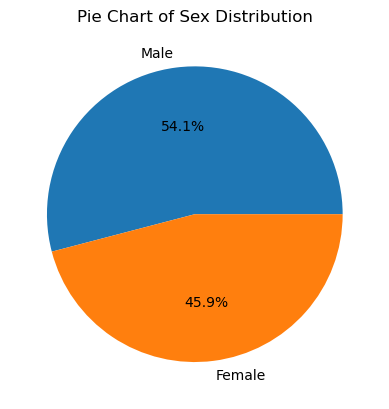

In [15]:
#getting Gender value counts
sex_counts = df1['Gender'].value_counts()

#creating pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Sex Distribution")
plt.show()

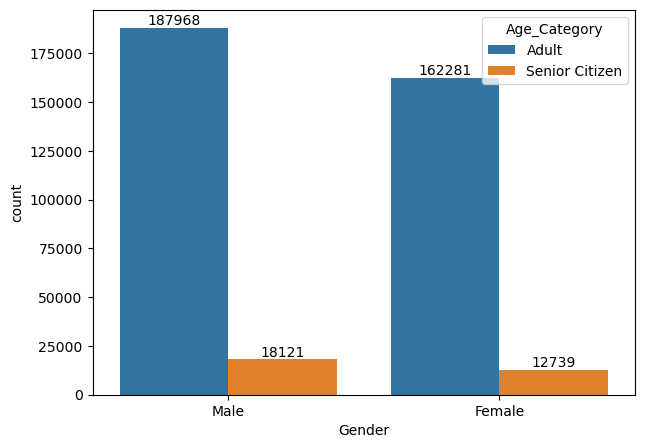

In [16]:
plt.figure(figsize=(7,5))
a = sns.countplot(x='Gender', hue='Age_Category', data=df1)

for bars in a.containers:
    a.bar_label(bars)

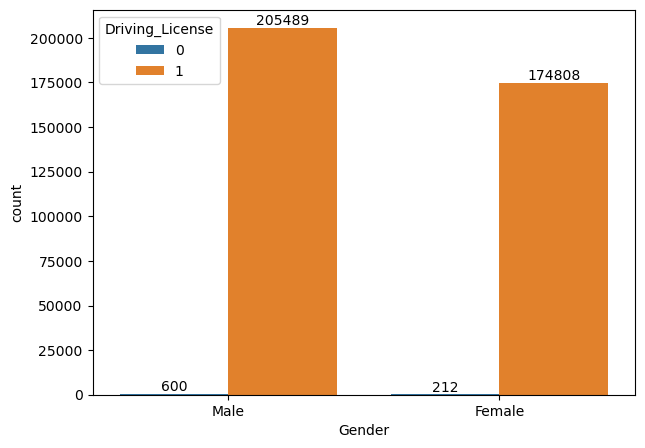

In [17]:
plt.figure(figsize=(7,5))
a = sns.countplot(x='Gender', hue='Driving_License', data=df1)

for bars in a.containers:
    a.bar_label(bars)

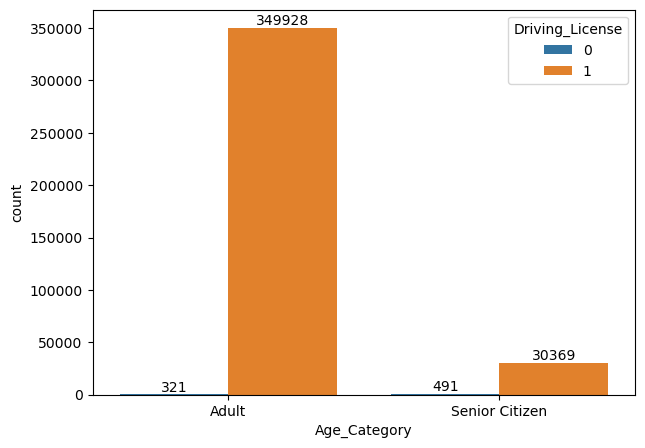

In [18]:
plt.figure(figsize=(7,5))
a = sns.countplot(x='Age_Category',hue='Driving_License', data=df1)

for bars in a.containers:
    a.bar_label(bars)

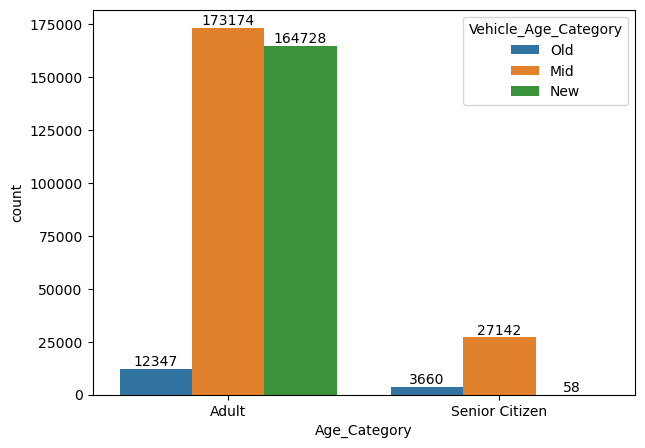

In [19]:
plt.figure(figsize=(7,5))
a = sns.countplot(x='Age_Category', hue='Vehicle_Age_Category', data=df1)

for bars in a.containers:
    a.bar_label(bars)

# **5. Lambda encoding**

In [20]:
df1.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Response,Age_Category,Vehicle_Age_Category
0,Male,1,0,Yes,40454,1,Adult,Old
1,Male,1,0,No,33536,0,Senior Citizen,Mid
2,Male,1,0,Yes,38294,1,Adult,Old
3,Male,1,1,No,28619,0,Adult,New
4,Female,1,1,No,27496,0,Adult,New


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                381109 non-null  object
 1   Driving_License       381109 non-null  int64 
 2   Previously_Insured    381109 non-null  int64 
 3   Vehicle_Damage        381109 non-null  object
 4   Annual_Premium        381109 non-null  int64 
 5   Response              381109 non-null  int64 
 6   Age_Category          381109 non-null  object
 7   Vehicle_Age_Category  381109 non-null  object
dtypes: int64(4), object(4)
memory usage: 23.3+ MB


In [22]:
df1['Age_Category'].value_counts()

Age_Category
Adult             350249
Senior Citizen     30860
Name: count, dtype: int64

In [23]:
df1['Vehicle_Age_Category'].value_counts()

Vehicle_Age_Category
Mid    200316
New    164786
Old     16007
Name: count, dtype: int64

In [24]:
#calling all columns with object data type
obj_col = df1.select_dtypes(include='object').columns
print('Columns with object data type: ',obj_col)

Columns with object data type:  Index(['Gender', 'Vehicle_Damage', 'Age_Category', 'Vehicle_Age_Category'], dtype='object')


In [25]:
#convert object data type columns to categorical data type
for x in obj_col:
    df1[x] = df1[x].astype('category')#select categorical columns and encode them with category codes

#select categorical columns and encode them with category codes
category_columns = df1.select_dtypes(['category']).columns
df1[category_columns] = df1[category_columns].apply(lambda x: x.cat.codes)

In [26]:
df1['Age_Category'].value_counts()

Age_Category
0    350249
1     30860
Name: count, dtype: int64

In [27]:
df1['Vehicle_Age_Category'].value_counts()

Vehicle_Age_Category
0    200316
1    164786
2     16007
Name: count, dtype: int64

In [28]:
df1.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Response,Age_Category,Vehicle_Age_Category
0,1,1,0,1,40454,1,0,2
1,1,1,0,0,33536,0,1,0
2,1,1,0,1,38294,1,0,2
3,1,1,1,0,28619,0,0,1
4,0,1,1,0,27496,0,0,1


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Gender                381109 non-null  int8 
 1   Driving_License       381109 non-null  int64
 2   Previously_Insured    381109 non-null  int64
 3   Vehicle_Damage        381109 non-null  int8 
 4   Annual_Premium        381109 non-null  int64
 5   Response              381109 non-null  int64
 6   Age_Category          381109 non-null  int8 
 7   Vehicle_Age_Category  381109 non-null  int8 
dtypes: int64(4), int8(4)
memory usage: 13.1 MB


In [30]:
#rearranging the target column
columns = list(df1.columns)
columns.remove('Response')
columns.append('Response')
df1 = df1[columns]
df1

,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Age_Category,Vehicle_Age_Category,Response
0,1,1,0,1,40454,0,2,1
1,1,1,0,0,33536,1,0,0
2,1,1,0,1,38294,0,2,1
3,1,1,1,0,28619,0,1,0
4,0,1,1,0,27496,0,1,0
...,...,...,...,...,...,...,...,...
381104,1,1,1,0,30170,1,0,0
381105,1,1,1,0,40016,0,1,0
381106,1,1,1,0,35118,0,1,0
381107,0,1,0,1,44617,1,2,0


# **6. Building the model**

In [31]:
#building the model with all the columns against claim amount
x = df1.drop(['Response'],axis=1)
y = df1['Response']

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
#standardize features before fitting the model
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
#model = LogisticRegression(max_iter=1000)
#model.fit(x_train,y_train)

In [34]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 87.53%


In [36]:
#get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#extract individual values from the confusion matrix
TP = cm[0][0]  # True Positives (correctly predicted positive)
TN = cm[1][1]  # True Negatives (correctly predicted negative)
FP = cm[1][0]  # False Positives (incorrectly predicted positive)
FN = cm[0][1]  # False Negatives (incorrectly predicted negative)

#print the confusion matrix and individual values
print("Confusion Matrix: \n", cm)
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)


Confusion Matrix: 
 [[100067    128]
 [ 14124     14]]

True Positives (TP): 100067
True Negatives (TN): 14
False Positives (FP): 14124
False Negatives (FN): 128


In [37]:
# Random Forest
#assuming you have your features (X_train) and target variable (y_train) for training

#define the model with desired hyperparameters (experiment with these)
model = RandomForestClassifier(n_estimators=100, max_depth=5)

#train the model
model.fit(x_train, y_train)

#make predictions on new data (X_test)
y_pred = model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}')

Accuracy: 87.63


In [38]:
# Gradient Boosting
#define the model with desired hyperparameters (experiment with these)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

#train the model
model.fit(x_train, y_train)
Z
#make predictions on new data (X_test)
y_pred = model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}')

Accuracy: 87.63
